## Importing required libraries

In [1]:
import os
import os.path as osp
import sys
import json
from pathlib import Path

import numpy as np
import torch
from typing import Dict, List, Tuple


CHECKOUT_PATH = osp.dirname(os.getcwd())
os.chdir(CHECKOUT_PATH)
sys.path.insert(0, CHECKOUT_PATH)


from fewmol.data import FSMOLDataset

## Check Training

In [66]:
# import visualization libraries
# import necessary modules for visualization:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


light_color = plt.get_cmap("plasma").colors[170]
dark_color = "black"


plt.rcParams.update(
    {
        "font.size": 20,
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": "Computer Modern Roman",
    }
)

In [67]:
## Reaing Chosen Training Tasks
with open("./datasets/fsmol/fsmol-0.2.json", "r") as f:
    fsmol_lookup = json.load(f)

In [68]:
# chembl_id = 'CHEMBL1963721'
chembl_id = fsmol_lookup["test"][0]

In [9]:
def train_val_curve(chembl_id: str, epoch: int = 10) -> Tuple[np.ndarray, np.ndarray]:
    assay_path = osp.join("outputs", f"epoch{epoch}", chembl_id)

    train_auc = []
    valid_auc = []
    for i in range(5):
        x = torch.load(osp.join(assay_path, f"config_{i}.pth"))
        train_auc.append(x["Train"])
        valid_auc.append(x["Val"])

    return np.array(train_auc), np.array(valid_auc)

In [10]:
train_auc, valid_auc = train_val_curve(chembl_id, epoch=10)

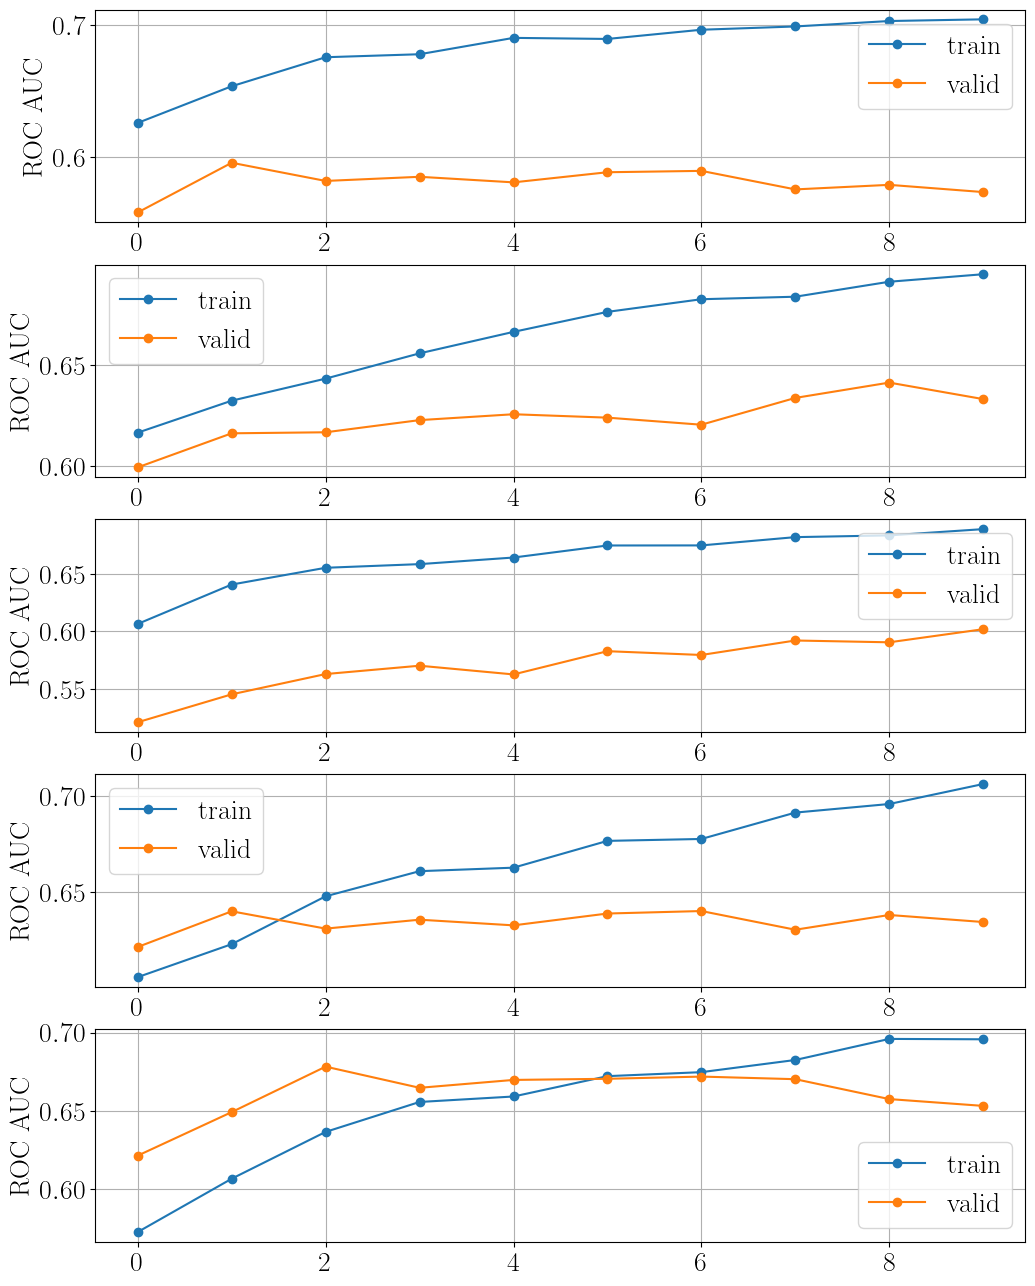

In [14]:
k_folds = train_auc.shape[0]

fig, ax = plt.subplots(k_folds, 1, figsize=(12, 16))
for i in range(k_folds):
    ax[i].plot(range(len(train_auc[i])), train_auc[i], label="train", marker="o")
    ax[i].plot(range(len(valid_auc[i])), valid_auc[i], label="valid", marker="o")
    ax[i].legend()
    ax[i].grid()
    ax[i].set_ylabel("ROC AUC")
    # ax[i].set_ylim([0.4, 0.75])

## Split data into training and testing sets

In [88]:
chembl_ids = fsmol_lookup["test"]
len(chembl_ids)

157

In [89]:
from fewmol.utils import get_split, get_split_multiple_size, get_split_multiple_assay

In [91]:
split_idx = get_split_multiple_assay(
    chembl_ids, training_size_list=[8, 16, 32, 64, 100], random_seed=42
)

Train size: 8
Test size: 409
Train size: 16
Test size: 401
Train size: 32
Test size: 385
Train size: 64
Test size: 353
Train size: 100
Test size: 317
Train size: 8
Test size: 200
Train size: 16
Test size: 192
Train size: 32
Test size: 176
Train size: 64
Test size: 144
Train size: 100
Test size: 108
Train size: 8
Test size: 200
Train size: 16
Test size: 192
Train size: 32
Test size: 176
Train size: 64
Test size: 144
Train size: 100
Test size: 108
Train size: 8
Test size: 1572
Train size: 16
Test size: 1564
Train size: 32
Test size: 1548
Train size: 64
Test size: 1516
Train size: 100
Test size: 1480
Train size: 8
Test size: 407
Train size: 16
Test size: 399
Train size: 32
Test size: 383
Train size: 64
Test size: 351
Train size: 100
Test size: 315
Train size: 8
Test size: 185
Train size: 16
Test size: 177
Train size: 32
Test size: 161
Train size: 64
Test size: 129
Train size: 100
Test size: 93
Train size: 8
Test size: 1458
Train size: 16
Test size: 1450
Train size: 32
Test size: 1434
Trai

In [100]:
import pickle

with open("datasets/fsmol/split_idx.pkl", "wb") as f:
    pickle.dump(split_idx, f)